## **Laboratório de Regressão Linear com Python**

A regressão linear simples é uma técnica estatística utilizada para modelar a relação entre uma variável dependente e uma variável independente. Neste laboratório, você irá explorar a implementação da regressão linear simples utilizando dois métodos: o método dos mínimos quadrados e a biblioteca de machine learning scikit-learn. O objetivo é entender como a regressão linear pode ser aplicada para prever valores e analisar a relação entre variáveis.

Ao final deste laboratório, espera-se que você:


* Tenha uma compreensão sólida dos conceitos de regressão linear simples e sua aplicação prática.
* Seja capaz de implementar a regressão linear simples utilizando o método dos mínimos quadrados em Python.
* Tenha experiência em utilizar a biblioteca scikit-learn para realizar análises de regressão.
* Seja capaz de interpretar os resultados da regressão e discutir a relação entre as variáveis analisadas.
* Produza um relatório que documente suas descobertas, incluindo gráficos, equações e interpretações dos resultados.

### **Regressão Linear**

Em diversas áreas, como medicina, biologia, indústria, química, finanças e engenharia, é de grande interesse verificar se duas ou mais variáveis estão relacionadas de alguma forma. Para expressar essa relação, é fundamental estabelecer um modelo matemático. Esse tipo de modelagem ajuda a entender como determinadas variáveis influenciam outras, ou seja, analisa como o comportamento de uma ou mais variáveis pode afetar o comportamento de outra.

A regressão linear é uma técnica que auxilia na previsão do valor de uma variável desconhecida ($Y$) com base em um valor conhecido ($X$). Um exemplo prático seria: “Qual é o preço de uma casa com base em seu número de quartos?”

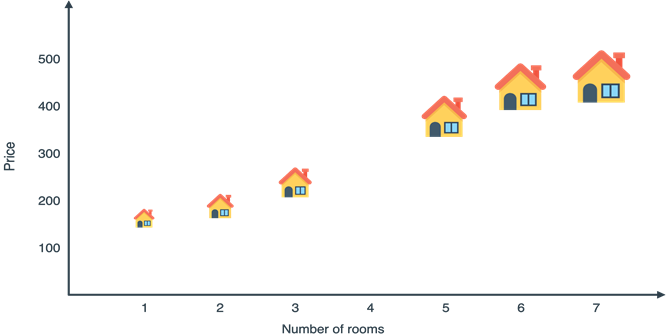

Neste caso, o preço é a variável que desejamos prever, utilizando o tamanho da casa como referência.

Para resolver esse problema, precisaríamos coletar dados históricos sobre tamanhos e preços de casas, treinar um modelo para aprender a relação matemática entre esses dados e, em seguida, fazer previsões de preços com base em outros tamanhos de casas. Como estamos analisando dados históricos para estimar um novo preço, isso se configura como um problema de regressão. A relação linear entre preço e tamanho (ou seja, quanto maior o tamanho da casa, maior o preço) caracteriza este como um problema de regressão linear.

O modelo de regressão linear assume que a relação entre as variáveis $Y$ e $X$
 é dada por:

 $$
 Y = \beta_0 + \beta_1 X + \epsilon
 $$

 em que $\beta_0$ e $\beta_1$ são os parâmetros do modelo e $\epsilon$
 é um termo aleatório.

 <img src="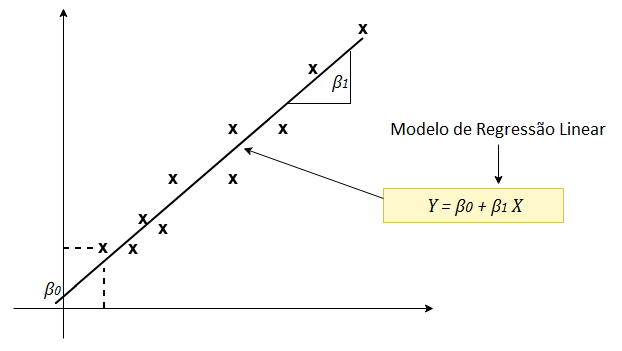
 " alt="imagem" width="400" height="220">

Se conhecermos $\beta_0$ e $\beta_1$ , basta utilizar o modelo de regressão linear para um determinado valor de $X$, digamos $x_1$, e saberemos o valor esperado de $Y$ dado $x_1$.

Infelizmente, nunca conhecemos $\beta_0$ e $\beta_1$ e então precisamos estimar esses valores utilizando os dados da nossa amostra.

Para encontrar os parâmetros ( $\beta_0$ ) e ( $\beta_1$ ), temos dois métodos:

* Método dos Mínimos Quadrados: Este método utiliza uma equação para calcular ( $\beta_0$ ) e outra equação para calcular ( $\beta_1$ ).

* Método de Machine Learning: Este método encontra ( $\beta_0$ ) e ( $\beta_1$ ) considerando várias possíveis variáveis de forma interessante, utilizando técnicas de otimização.

---
Gerando dados fictícios para o número de quartos (X) e preço da casa (Y)

num_quartos:  [5 1 4 4 4 2 4 3 5 1 1 5 3 2 1 2 2 1 2 5 4 1 4 1 3 4 1 2 4 4]
preco_casa:  [211682.7  89471.9 180854.9 193822.2 165939.8 112664.5 156442.9 138859.
 191557.7  87056.4  76012.1 191728.  135842.6 104754.9  88131.  107707.5
 131617.2  70430.7 110673.1 202065.  165431.2  69400.2 176149.6  94296.6
 137880.5 169196.6  84054.  111186.1 182544.1 184191. ]


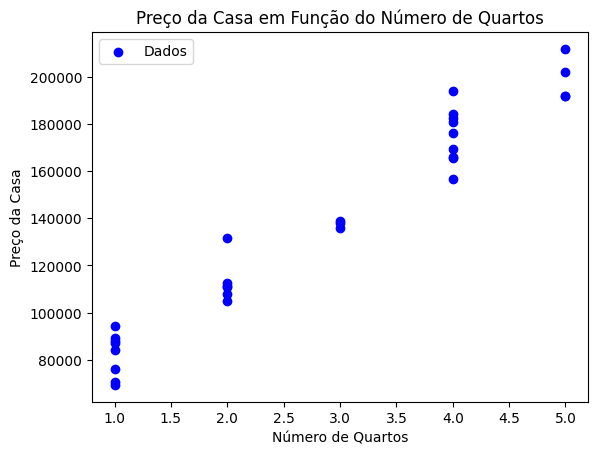

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Para reprodutibilidade
num_quartos = np.random.randint(1, 6, size=30)  # 1 a 5 quartos
preco_casa = 50000 + (num_quartos * 30000) + np.random.normal(0, 10000, size=30).round(1)  # Preço com um pouco de ruído
print("num_quartos: ", num_quartos)
print("preco_casa: ", preco_casa)

# Visualizando os dados e a linha de regressão
plt.scatter(num_quartos, preco_casa, color='blue', label='Dados')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço da Casa')
plt.title('Preço da Casa em Função do Número de Quartos')
plt.legend()
plt.show()

### **1- Método dos Mínimos Quadrados**

A equação para calcular ( $\beta_1$ ) (o coeficiente angular, inclinação da reta) é:

$$
\beta_1 = \frac{\sum (x_i - \bar{X})(y_i - \bar{Y})}{\sum (x_i - \bar{X})^2}
$$

A fórmula para calcular ( $\beta_1$ ) (o coeficiente linear, intercessão com eixo $y$) é:

$$
\beta_0 = \bar{Y} - \beta_1 \bar{X}
$$

Onde:

* $x_i$ e $y_i$ são os valores das variáveis independentes e dependentes, respectivamente.

* $\bar{X}$ é a média dos valores de ( $X$ ).

* $\bar{Y}$ é a média dos valores de ( $Y$ ).

In [3]:
def calcular_beta1(x, y):
    """Calcula o coeficiente Beta1 usando o método dos mínimos quadrados."""
    x = np.array(x)
    y = np.array(y)

    x_bar = np.mean(x)
    y_bar = np.mean(y)

    beta1_numerador = np.sum((x - x_bar) * (y - y_bar))
    beta1_denominador = np.sum((x - x_bar) ** 2)
    beta1 = beta1_numerador / beta1_denominador

    return beta1.round(1)

def calcular_beta0(x, y, b1):
    """Calcula o coeficiente Beta0 usando o método dos mínimos quadrados."""
    y_bar = np.mean(y)
    x_bar = np.mean(x)
    beta0 = y_bar - b1 * x_bar
    return beta0.round(1)

Executando com os valores $X$ como número de quartos e $Y$ como preço da casa

In [4]:
# Calculando Beta1 e Beta0
beta1 = calcular_beta1(num_quartos, preco_casa)
beta0 = calcular_beta0(num_quartos, preco_casa, beta1)

print(f"Beta0: {beta0} \nBeta1: {beta1}")

Beta0: 52649.4 
Beta1: 29907.8


Assim,
 $$
 \text{preço_casa} = \beta_0 + \beta_1 \ \text{num_quartos}
 $$

 $$
 \text{preço_casa} = 52649.4 + 29907.8 \ \text{num_quartos}
 $$

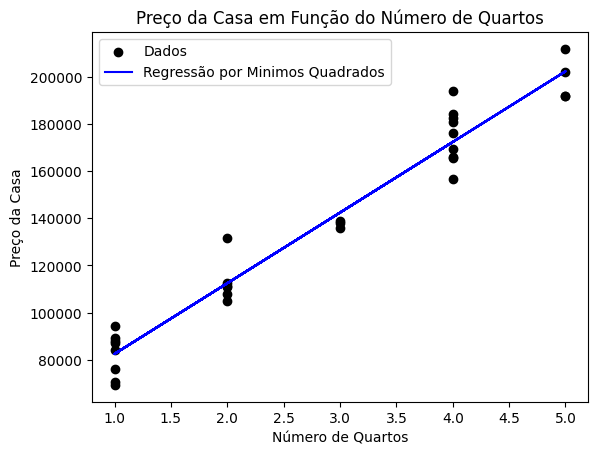

In [7]:
# Visualizando os dados e a linha de regressão
plt.scatter(num_quartos, preco_casa, color='black', label='Dados')
plt.plot(num_quartos, beta0 + beta1 * num_quartos, color='blue', label='Regressão por Minimos Quadrados')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço da Casa')
plt.title('Preço da Casa em Função do Número de Quartos')
plt.legend()
plt.show()

### **2- Método de Machine Learning**

Aplicando todos os conceitos e fórmulas que discutimos anteriormente, vamos utilizar o Python e sua poderosa biblioteca para machine learning, o scikit-learn. Mas o que é o scikit-learn?

Essa biblioteca oferece um conjunto de ferramentas para pré-processamento de dados e modelos de aprendizado de máquina, incluindo a regressão linear, que está disponível no módulo `linear_model`, juntamente com outros modelos lineares.

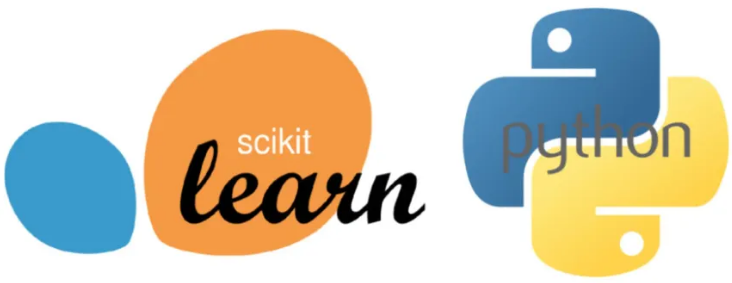

É possível, com base em características (`features` ou `input` ou variáveis independentes, representadas por ( $x$ )), fazer previsões sobre o alvo (`target` ou `output` ou variável dependente, representada por ( $y$ )).

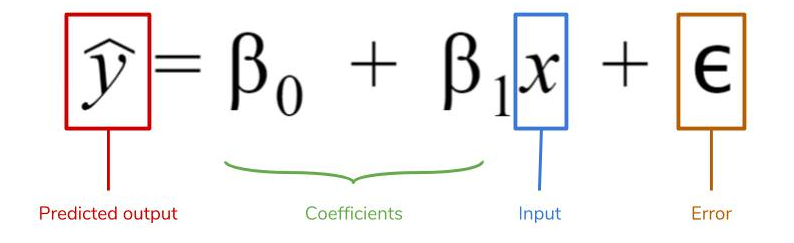

Lembre-se de que uma variável dependente é o valor que estamos prevendo, enquanto uma variável independente é aquela que utilizamos para prever a variável dependente.

Para encontrar $\beta_0$ e $\beta_1$, o modelo de regressão linear irá testar várias combinações possíveis de parâmetros (ou seja, $\beta_0$ e $\beta_1$). A cada iteração, o modelo otimiza a regressão, conforme ilustrado na imagem a seguir.

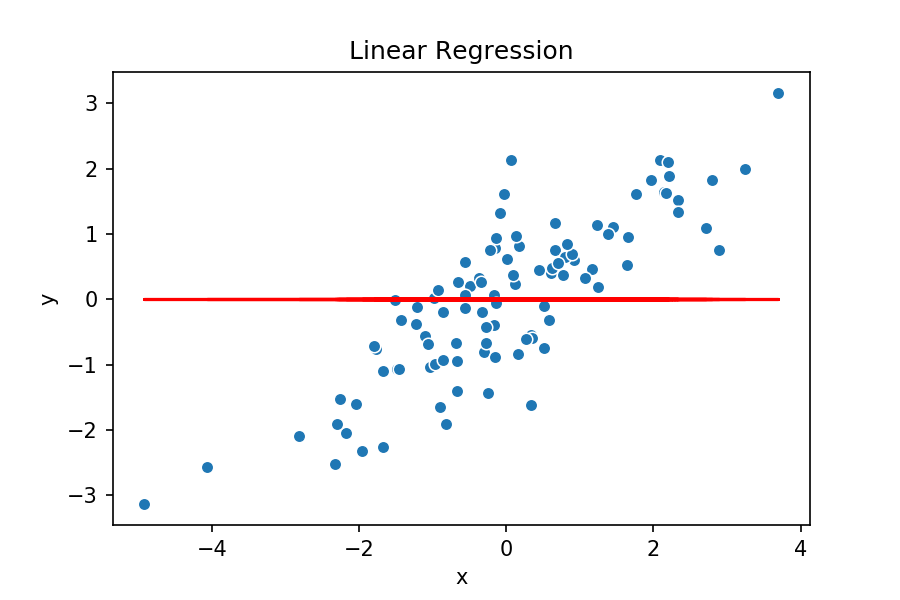

#### **Implementando Regressão Linear**

O método `.fit` é utilizado para treinar o modelo com os dados de entrada (variáveis independentes, `input`) e os dados de saída (variáveis dependentes, `output`). Durante esse processo, o modelo ajusta os parâmetros $\beta_0$ e $\beta_1$ para minimizar a diferença entre as previsões do modelo e os valores reais.

O método `.predict` é utilizado para fazer previsões com o modelo treinado. Ele recebe como entrada um conjunto de dados (variáveis independentes, `input`) e retorna as previsões correspondentes (variáveis dependentes, `output`). O modelo utiliza os parâmetros ajustados durante o treinamento para calcular as previsões.

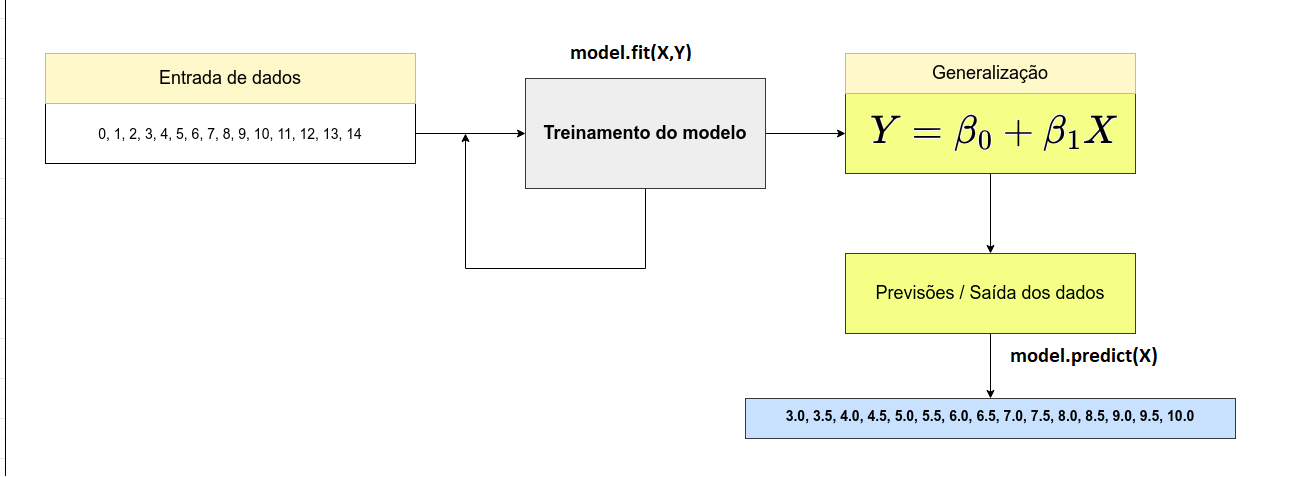

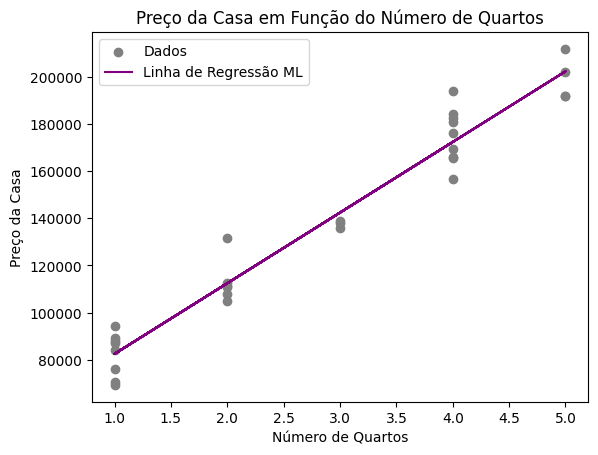



Equação da Regressão: preço_casa = 52649.3 + 29907.8 * num_quartos
beta_0:  52649.3
beta_1:  29907.8


In [12]:
from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão
model = LinearRegression()

#treinar o modelo de regressão linear
model.fit(X=np.array(num_quartos).reshape(-1,1), y=np.array(preco_casa))

# Coeficientes
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Plotar a linha de regressão
plt.scatter(num_quartos, preco_casa, color='Gray', label='Dados')
plt.plot(num_quartos, model.predict(np.array(num_quartos).reshape(-1, 1)), color='purple', label='Linha de Regressão ML')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço da Casa')
plt.title('Preço da Casa em Função do Número de Quartos')
plt.legend()
plt.show()

# Exibir a equação da regressão
print(f"\n\nEquação da Regressão: preço_casa = {beta_0:.1f} + {beta_1:.1f} * num_quartos")

print("beta_0: ", beta_0.round(1))
print("beta_1: ", beta_1.round(1))

Com o modelo de regressão linear simples (MRLS), predecir o preço da casa quando o numero de quartos sejam 7 e 10.

Com o número de quartos 7 e 10, os preço da casa é:  [262004.12975871 351727.64718499]


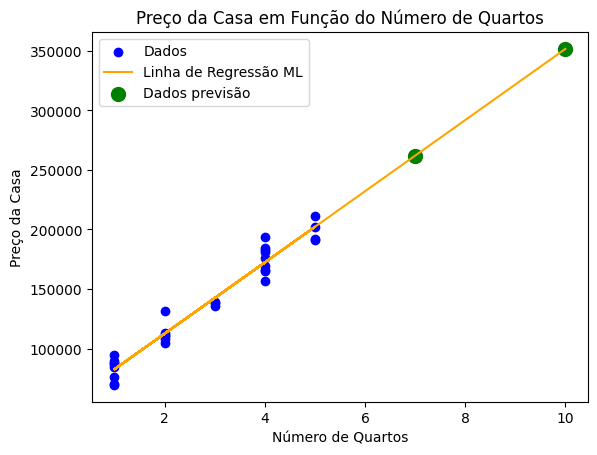

In [15]:
num_quartos_predecir = np.array([7,10])
predecir = model.predict(num_quartos_predecir.reshape(-1,1))
print("Com o número de quartos 7 e 10, os preço da casa é: ", predecir)

all_data = np.concatenate((num_quartos,num_quartos_predecir))

# Plotar a linha de regressão
plt.scatter(num_quartos, preco_casa, color='blue', label='Dados')
plt.plot(all_data, model.predict(np.array(all_data).reshape(-1, 1)), color='orange', label='Linha de Regressão ML')
plt.scatter(num_quartos_predecir, predecir, color='green', label='Dados previsão', s=100)
plt.xlabel('Número de Quartos')
plt.ylabel('Preço da Casa')
plt.title('Preço da Casa em Função do Número de Quartos')
plt.legend()
plt.show()


----
### **T1: Análise de Preços de Aluguel de Apartamentos**

Você foi contratado por uma imobiliária para analisar os preços de aluguel de apartamentos em uma determinada cidade. A imobiliária deseja entender como o tamanho do apartamento (em metros quadrados) influencia o preço do aluguel. Para isso, você coletou dados de 50 apartamentos, incluindo o tamanho e o preço do aluguel.

Dados:

Você possui um conjunto de dados com as seguintes informações:

* Tamanho do Apartamento (m²): A área do apartamento em metros quadrados.
* Preço do Aluguel (R$): O valor do aluguel mensal em reais.

Os dados estão organizados em duas colunas, onde cada linha representa um apartamento.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definindo a semente para reprodutibilidade
np.random.seed(0)

# Gerando dados fictícios
num_apartamentos = 50
tamanho_apartamento = np.random.randint(30, 150, size=num_apartamentos)  # Tamanhos entre 30 e 150 m²

# Gerando preços de aluguel com uma relação linear e um pouco de ruído
# Preço base + (tamanho * coeficiente) + ruído aleatório
preco_base = 500
coeficiente = 30  # Preço por metro quadrado
ruido = np.random.normal(0, 200, size=num_apartamentos)  # Ruído aleatório

preco_aluguel = (preco_base + (tamanho_apartamento * coeficiente) + ruido).round(1)

print("Tamanho do apartamento: ", tamanho_apartamento)
print("Preço do aluguel: ", preco_aluguel)

Tamanho do apartamento:  [ 74  77 147  94  97  97 133  39 113  51 144  66 117 100 118 118  42  88
  95 132  69 117  76 118 111  67  55 107 102  39  50 145 110 145  99 109
  77  94 112 129 118  79 145  59  49  49  44  69  62  95]
Preço do aluguel:  [2209.4 2940.7 5082.9 3171.6 3864.  3119.1 4499.2 1632.6 4196.6 2323.9
 4851.  2555.6 3832.4 3103.8 3970.4 4071.3 2006.1 3380.5 3272.5 4399.5
 2360.3 3726.  2438.7 4430.2 3728.1 2422.4 1899.4 3865.5 3237.2 1627.5
 1820.9 4927.4 3697.8 4613.9 3464.4 3855.7 2823.3 3380.5 3733.1 4297.5
 3905.5 2798.1 4687.4 1924.7 2005.5 1889.6 1494.  2662.6 2178.5 3360.4]


**T1-a:** Criar o gráfico de dispersão para visualizar a posição dos pontos.

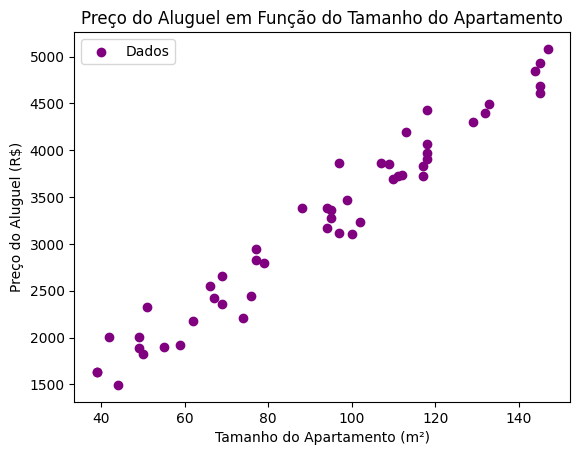

In [19]:
######### YOUR CODE HERE ##########

plt.scatter(tamanho_apartamento, preco_aluguel, color='purple', label='Dados')
plt.xlabel('Tamanho do Apartamento (m²)')
plt.ylabel('Preço do Aluguel (R$)')
plt.title('Preço do Aluguel em Função do Tamanho do Apartamento')
plt.legend()
plt.show()


**T1-b:** Criar o modelo de regressão linear simples (MRLS).

Ou seja, substitua as variáveis $X$ e $Y$ na equação $Y = \beta_0 + \beta_1 \ X$ pelos nomes das variáveis que você está utilizando. Por exemplo: $\text{preço_do_carro} = \beta_0 + \beta_1 \ \text{tempo_de_uso}$

Escreva Aqui:

preço_do_aluguel = β0+β1 tamanho_do_Apartamento


**T1-c:** Encontrar os parâmetros $\beta_0$ e $\beta_1$ da regressão linear usando o método dos mínimos quadrados.

In [20]:
######### YOUR CODE HERE ##########

def calcular_beta(x, y):
    """Calcula o coeficiente Beta1 usando o método dos mínimos quadrados."""
    x = np.array(x)
    y = np.array(y)

    x_b0 = np.mean(x)
    y_b1 = np.mean(y)

    beta_numerador = np.sum((x - x_b0) * (y - y_b1))
    beta_denominador = np.sum((x - x_b0) ** 2)
    beta = beta_numerador / beta_denominador

    return beta1.round(1)

def calcular_beta0(x, y, b1):
    """Calcula o coeficiente Beta0 usando o método dos mínimos quadrados."""
    y_b1 = np.mean(y)
    x_b0 = np.mean(x)
    beta0 = y_b1 - b1 * x_b0
    return beta0.round(1)

    # Calculando Beta1 e Beta0
    beta1 = calcular_beta(tamanho_apartamento, preco_aluguel)
    beta0 = calcular_beta0(tamanho_apartamento, preco_aluguel, beta1)
    print("beta0: ", beta0)
    print("beta1: ", beta1)

print(f"Beta0: {beta0} \nBeta1: {beta1}")


Beta0: 52649.4 
Beta1: 29907.8


**T1-d:** Encontrar os parâmetros $\beta_0$ e $\beta_1$ da regressão linear usando o método de machine learning.

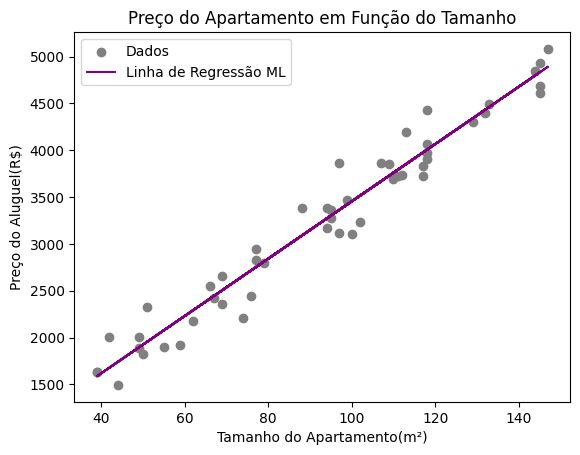



Equação da Regressão: preço_aluguel = 393.4 + 30.6 * tamanho_apartamento
beta_0:  393.4
beta_1:  30.6


In [26]:
######### YOUR CODE HERE ##########

from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão
model = LinearRegression()

#treinar o modelo de regressão linear
model.fit(X=np.array(tamanho_apartamento).reshape(-1,1), y=np.array(preco_aluguel))

# Coeficientes
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Plotar a linha de regressão
plt.scatter(tamanho_apartamento, preco_aluguel, color='Gray', label='Dados')
plt.plot(tamanho_apartamento, model.predict(np.array(tamanho_apartamento).reshape(-1, 1)), color='purple', label='Linha de Regressão ML')
plt.xlabel('Tamanho do Apartamento(m²)')
plt.ylabel('Preço do Aluguel(R$)')
plt.title('Preço do Apartamento em Função do Tamanho')
plt.legend()
plt.show()

# Exibir a equação da regressão
print(f"\n\nEquação da Regressão: preço_aluguel = {beta_0:.1f} + {beta_1:.1f} * tamanho_apartamento")

print("beta_0: ", beta_0.round(1))
print("beta_1: ", beta_1.round(1))


**T1-e:** Prever, com o modelo de machine learning, o preço do aluguel para apartamentos de $170$ e $200$ metros quadrados.

Com o número de quartos 7 e 10, os preço da casa é:  [5596.28088359 6514.43674812]


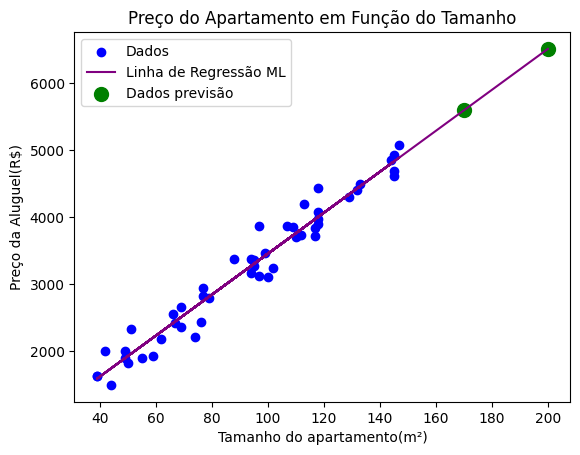

In [31]:
######### YOUR CODE HERE #########
preco_aluguel_predecir = np.array([170,200])
predecir = model.predict(preco_aluguel_predecir.reshape(-1,1))
print("Com o preço do aluguel para apartamentos de  170  e  200  metros quadrados: ", predecir)

all_data = np.concatenate((tamanho_apartamento,preco_aluguel_predecir))

# Plotar a linha de regressão
plt.scatter(tamanho_apartamento, preco_aluguel, color='blue', label='Dados')
plt.plot(all_data, model.predict(np.array(all_data).reshape(-1, 1)), color='purple', label='Linha de Regressão ML')
plt.scatter(preco_aluguel_predecir, predecir, color='green', label='Dados previsão', s=100)
plt.xlabel('Tamanho do apartamento(m²)')
plt.ylabel('Preço da Aluguel(R$)')
plt.title('Preço do Apartamento em Função do Tamanho')
plt.legend()
plt.show()


### **T2: Análise do Consumo de Energia Elétrica**

Você foi contratado por uma empresa de energia elétrica para analisar como a temperatura média diária influencia o consumo de energia em residências. A empresa deseja entender essa relação para otimizar sua distribuição de energia e planejar campanhas de conscientização sobre o uso eficiente de energia. Para isso, você coletou dados de 100 dias, incluindo a temperatura média diária e o consumo de energia.

Dados:

Você possui um conjunto de dados com as seguintes informações:

* Temperatura Média (°C): A temperatura média diária em graus Celsius.
* Consumo de Energia (kWh): O consumo de energia elétrica em quilowatts-hora.

Os dados estão organizados em duas colunas, onde cada linha representa um dia.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definindo a semente para reprodutibilidade
np.random.seed(0)

# Gerando dados fictícios
num_dias = 100
temperatura_media = np.random.uniform(15, 35, size=num_dias).round(1)  # Temperaturas entre 15°C e 35°C

# Gerando consumo de energia com uma relação linear e um pouco de ruído
consumo_base = 50  # Consumo básico
coeficiente = 2.5  # Aumento no consumo por grau Celsius
ruido = np.random.normal(0, 5, size=num_dias)  # Ruído aleatório

consumo_energia = (consumo_base + (temperatura_media * coeficiente) + ruido).round(1)

print("Temperatura media: ", temperatura_media)
print("Consumo de energia: ", consumo_energia)

Temperatura media:  [26.  29.3 27.1 25.9 23.5 27.9 23.8 32.8 34.3 22.7 30.8 25.6 26.4 33.5
 16.4 16.7 15.4 31.7 30.6 32.4 34.6 31.  24.2 30.6 17.4 27.8 17.9 33.9
 25.4 23.3 20.3 30.5 24.1 26.4 15.4 27.4 27.2 27.3 33.9 28.6 22.2 23.7
 29.  16.2 28.3 28.4 19.2 17.6 21.3 22.3 26.4 23.8 34.8 17.  19.2 18.2
 28.1 20.1 24.3 19.9 18.2 17.2 28.1 17.8 18.9 22.4 31.4 16.9 31.8 16.9
 34.5 24.4 34.5 27.1 29.8 15.8 20.7 17.4 20.9 17.4 21.4 23.3 16.3 28.8
 26.3 20.3 25.5 16.9 26.5 33.6 21.4 28.3 17.6 29.3 20.8 18.7 26.7 15.4
 31.6 15.1]
Consumo de energia:  [109.2 127.8 120.1 107.1 116.2 129.2 115.4 131.1 130.4 112.  125.  120.1
 117.  138.6  92.8  95.3  88.6 138.2 127.1 133.  145.9 120.8 104.1 131.3
  87.6 129.2  92.7 131.  123.1 115.7 110.1 130.8 105.9 125.6  87.2 122.5
 122.7 117.5 137.8 126.1 107.4 103.8 124.   97.1 117.3 120.3  95.8 103.2
 106.6 107.8 112.2 112.2 133.6  92.7  94.8  98.9 123.1  99.2 112.7  94.3
  88.   95.2 121.1  97.7 109.2 110.7 123.9  97.8 122.9  89.9 135.9 119.6
 132.5 113.6

**T2-a:** Criar o gráfico de dispersão para visualizar a posição dos pontos.

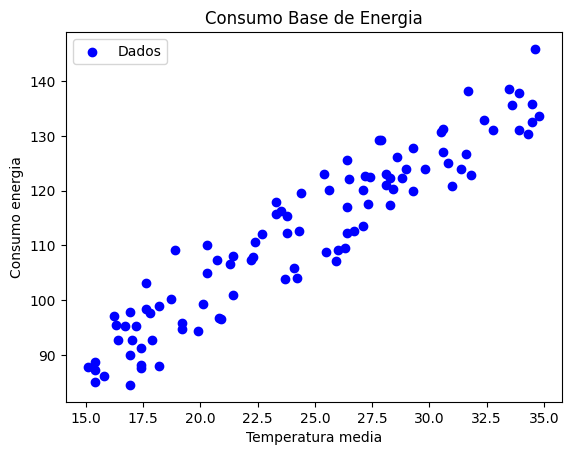

In [36]:
######### YOUR CODE HERE ##########
plt.scatter(temperatura_media, consumo_energia, color='Blue', label='Dados')
plt.xlabel('Temperatura media')
plt.ylabel('Consumo energia')
plt.title('Consumo Base de Energia')
plt.legend()
plt.show()


**T2-b:** Criar o modelo de regressão linear simples (MRLS).

Ou seja, substitua as variáveis $X$ e $Y$ na equação $Y = \beta_0 + \beta_1 \ X$ pelos nomes das variáveis que você está utilizando. Por exemplo: $\text{preço_do_carro} = \beta_0 + \beta_1 \ \text{tempo_de_uso}$

Escreva aqui:
temperatura_media = β0+β1 consumo_energia

**T2-c:** Encontrar os parâmetros $\beta_0$ e $\beta_1$ da regressão linear usando o método dos mínimos quadrados.

In [38]:
######### YOUR CODE HERE ##########
def calcular_beta(x, y):
    """Calcula o coeficiente Beta1 usando o método dos mínimos quadrados."""
    x = np.array(x)
    y = np.array(y)

    x_b0 = np.mean(x)
    y_b1 = np.mean(y)

    beta_numerador = np.sum((x - x_b0) * (y - y_b1))
    beta_denominador = np.sum((x - x_b0) ** 2)
    beta = beta_numerador / beta_denominador

    return beta1.round(1)

def calcular_beta0(x, y, b1):
    """Calcula o coeficiente Beta0 usando o método dos mínimos quadrados."""
    y_b1 = np.mean(y)
    x_b0 = np.mean(x)
    beta0 = y_b1 - b1 * x_b0
    return beta0.round(1)

    # Calculando Beta1 e Beta0
    beta1 = calcular_beta(temperatura_media, consumo_energia)
    beta0 = calcular_beta0(temperatura_media, consumo_energia, beta1)
    print("beta0: ", beta0)
    print("beta1: ", beta1)

print(f"Beta0: {beta0} \nBeta1: {beta1}")

Beta0: 52649.4 
Beta1: 29907.8


**T2-d:** Encontrar os parâmetros $\beta_0$ e $\beta_1$ da regressão linear usando o método de machine learning.

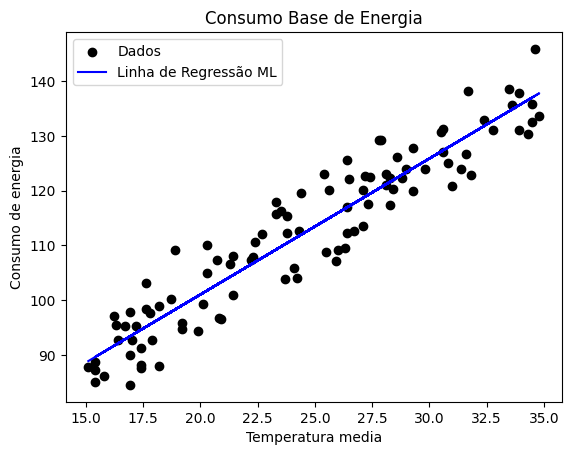



Equação da Regressão: consumo_energia = 51.4 + 2.5 * temperatura_media
beta_0:  51.4
beta_1:  2.5


In [40]:
######### YOUR CODE HERE ##########

from sklearn.linear_model import LinearRegression

# Criar o modelo de regressão
model = LinearRegression()

#treinar o modelo de regressão linear
model.fit(X=np.array(temperatura_media).reshape(-1,1), y=np.array(consumo_energia))

# Coeficientes
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Plotar a linha de regressão
plt.scatter(temperatura_media, consumo_energia, color='black', label='Dados')
plt.plot(temperatura_media, model.predict(np.array(temperatura_media).reshape(-1, 1)), color='blue', label='Linha de Regressão ML')
plt.xlabel('Temperatura media')
plt.ylabel('Consumo de energia')
plt.title('Consumo Base de Energia')
plt.legend()
plt.show()

# Exibir a equação da regressão
print(f"\n\nEquação da Regressão: consumo_energia = {beta_0:.1f} + {beta_1:.1f} * temperatura_media")

print("beta_0: ", beta_0.round(1))
print("beta_1: ", beta_1.round(1))


**T2-e:** Prever, com o modelo de machine learning, o consumo de energia quando a temperatura for de 10°C e 40°C

Com o consumo de energia quando a temperatura for de 10°C e 40°C:  [ 76.19372652 150.70774577]


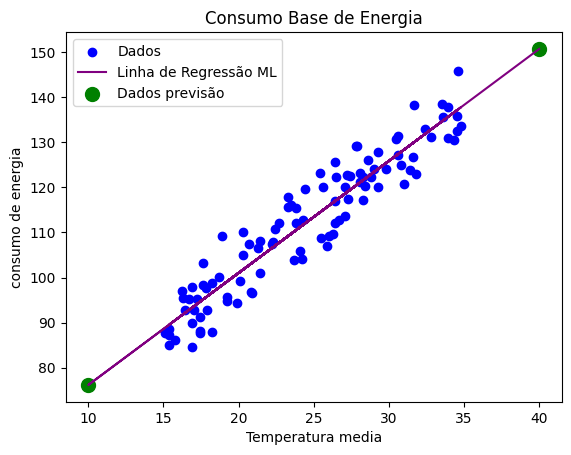

In [42]:
######### YOUR CODE HERE ##########
consumo_energia_predecir = np.array([10,40])
predecir = model.predict(consumo_energia_predecir.reshape(-1,1))
print("Com o consumo de energia quando a temperatura for de 10°C e 40°C: ", predecir)

all_data = np.concatenate((temperatura_media,consumo_energia_predecir))

# Plotar a linha de regressão
plt.scatter(temperatura_media, consumo_energia, color='blue', label='Dados')
plt.plot(all_data, model.predict(np.array(all_data).reshape(-1, 1)), color='purple', label='Linha de Regressão ML')
plt.scatter(consumo_energia_predecir, predecir, color='green', label='Dados previsão', s=100)
plt.xlabel('Temperatura media')
plt.ylabel('consumo de energia')
plt.title('Consumo Base de Energia')
plt.legend()
plt.show()

